# Week 9 Problem Set

## Cohort Session

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**CS0.** *Plot:* Read data for Boston Housing Prices and write a function `get_features_targets()` to get the columns for the features and the targets from the input argument data frame. The function should take in Pandas' dataframe and two lists. The first list is for the feature names and the other list is for the target names. 

We will use the following columns for our test cases:
- x data: RM column - use z normalization (standardization)
- y data: MEDV column

**Make sure you return a new data frame for both the features and the targets.**

We will normalize the feature using z normalization. Plot the data using scatter plot. 



In [67]:
def normalize_z(dfin):
    dfout = (dfin - dfin.mean(axis=0))/dfin.std(axis=0)
    return dfout

In [68]:
def get_features_targets(df, feature_names, target_names):
    df_feature = df[feature_names]
    df_target = df[target_names]
    return df_feature, df_target

In [69]:
df = pd.read_csv("housing_processed.csv")
df_feature, df_target = get_features_targets(df,["RM"],["MEDV"])
df_feature = normalize_z(df_feature)

assert isinstance(df_feature, pd.DataFrame)
assert isinstance(df_target, pd.DataFrame)
assert np.isclose(df_feature.mean(), 0.0)
assert np.isclose(df_feature.std(), 1.0)
assert np.isclose(df_target.mean(), 22.532806)
assert np.isclose(df_target.std(), 9.1971)


In [70]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


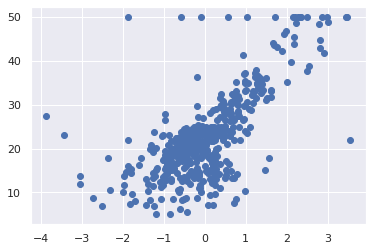

In [71]:
sns.set()
plt.scatter(df_feature, df_target)

**CS1.** *Cost Function:* Write a function `compute_cost()` to compute the cost function of a linear regression model. The function should take in two 2-D numpy arrays. The first one is the matrix of the linear equation and the second one is the actual target value.

Recall that:

$$J(\hat{\beta}_0, \hat{\beta}_1) = \frac{1}{2m}\Sigma^m_{i=1}\left(\hat{y}(x^i)-y^i\right)^2$$

where

$$\hat{y}(x^i) = \hat{\beta}_0 + \hat{\beta}_1 x^i$$

The function should receive a numpy array, so we will need to convert to numpy array and change the shape. To do this, we will create two other functions:
- `prepare_feature(df)`: which takes in a data frame for the feature. The function should convert the data frame to a numpy array and change it into a column vector. The function should also add a column of constant 1s in the first column.
- `prepare_target(df)`: which takes in a data frame for the target. The function should simply convert the data frame to a numpy array and change it into column vectors. **The function should be able to handle if the data frame has more than one column.**

You can use the following methods in your code:
- `df.to_numpy()`: which is to convert a Pandas data frame to Numpy array.
- `np.reshape(row, col)`: which is to reshape the numpy array to a particular shape.
- `np.concatenate((array1, array2), axis)`: which is to join a sequence of arrays along an existing axis.
- `np.matmul(array1, array2)`: which is to do matrix multiplication on two Numpy arrays.


In [72]:
def compute_cost(X, y, beta):
    J = 0
    m = y.shape[0]
    yp = np.matmul(X, beta)
    error = yp - y
    J = (1 / (2*m))*np.matmul(error.T, error)
    J = J[0][0]
#     print(J, J[0], J[0][0])
    return J

# beta = np.zeros((2,1))
# J = compute_cost()

In [73]:
def prepare_feature(df_feature):
    feature = df_feature.to_numpy()
    array1 = np.ones((feature.shape[0], 1))
    X = np.concatenate((array1,feature), axis = 1)
    return X
    
X = prepare_feature(df_feature)


In [74]:
def prepare_target(df_target):
    return df_target.to_numpy()


In [75]:
X = prepare_feature(df_feature)
target = prepare_target(df_target)

assert isinstance(X, np.ndarray)
assert isinstance(target, np.ndarray)
assert X.shape == (506, 2)
assert target.shape == (506, 1)

In [76]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [77]:
# print(X)
beta = np.zeros((2,1))
J = compute_cost(X, target, beta)
print(J)
assert np.isclose(J, 296.0735)

beta = np.ones((2,1))
J = compute_cost(X, target, beta)
print(J)
assert np.isclose(J, 268.157)

beta = np.array([-1, 2]).reshape((2,1))
J = compute_cost(X, target, beta)
print(J)
assert np.isclose(J, 308.337)


296.07345849802374
268.1570051486897
308.33699448710274


In [78]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**CS2.** *Gradient Descent:* Write a function called `gradient_descent()` that takes in these parameters:
- `X`: is a 2-D numpy array for the features
- `y`: is a vector array for the target
- `beta`: is a column vector for the initial guess of the parameters
- `alpha`: is the learning rate
- `num_iters`: is the number of iteration to perform

The function should return two numpy arrays:
- `beta`: is coefficient at the end of the iteration
- `J_storage`: is the array that stores the cost value at each iteration

You can use some of the following functions:
- `np.matmul(array1, array2)`: which is to do matrix multiplication on two Numpy arrays.
- `compute_cost()`: which the function you created in the previous problem set to compute the cost.

In [79]:
def gradient_descent(X, y, beta, alpha, num_iters):
    #calculate m from the shape of X or Y
    m = X.shape[0]
    J_storage = np.zeros(num_iters)
#     num_iters = 1
    #compute the predicted y
    for n in range(num_iters):
    #compute the error
        yp = np.matmul(X, beta)
        error = yp - y
#         print(yp.shape)
        beta = beta - (alpha / m) * np.matmul(X.T, error)
        
    #compute the new dbeta
    #compute J usin the new beta and store it
        J_storage[n] = compute_cost(X, y, beta)
#         print(J_storage[n])
    #return beta,J_storage
    return beta, J_storage

iterations = 200
alpha = 0.01
beta = np.zeros((2,1))
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

In [80]:
iterations = 1500
alpha = 0.01
beta = np.zeros((2,1))

beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
print(beta)
assert np.isclose(beta[0], 22.5328)
assert np.isclose(beta[1], 6.3953)

[[22.53279993]
 [ 6.39529594]]


In [81]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


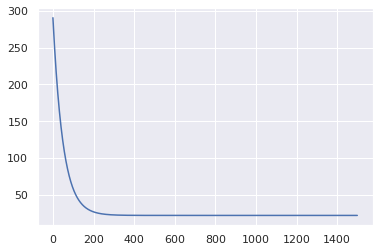

In [82]:
plt.plot(J_storage)

**CS3.** *Predict:* Write two functions `predict()` and `predict_norm()` that calculate the straight line equation given the features and its coefficient.
- `predict()`: this function should standardize the feature using z normalization, change it to a Numpy array, and add a column of constant 1s. You should use `prepare_feature()` for this purpose. Lastly, this function should also call `predict_norm()` to get the predicted y values.
- `predict_norm()`: this function should calculate the straight line equation after standardization and adding of column for constant 1.

You can use some of the following functions:
- `np.matmul(array1, array2)`: which is to do matrix multiplication on two Numpy arrays.
- `normalize_z(df)`: which is to do z normalization on the data frame.

In [83]:
def predict_norm(X, beta):
    return np.matmul(X, beta)
    

In [84]:
def predict(df_feature, beta):
    feature_norm = normalize_z(df_feature)
    X = prepare_feature(feature_norm)
    return predict_norm(X,beta)




In [85]:
df_feature, buf = get_features_targets(df, ["RM"], [])
beta = [[22.53279993],[ 6.39529594]] # from previous result
pred = predict(df_feature, beta)

assert isinstance(pred, np.ndarray)
assert pred.shape == (506, 1)
assert np.isclose(pred.mean(), 22.5328)
assert np.isclose(pred.std(), 6.38897)

In [86]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


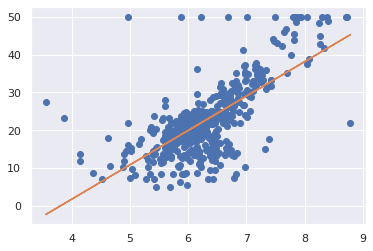

In [87]:
plt.plot(df_feature["RM"],target,'o')
plt.plot(df_feature["RM"],pred,'-')

**CS4.** *Splitting data:* Do the following tasks:
- Read RM as the feature and MEDV as the target from the data frame.
- Use Week 9's function `split_data()` to split the data into train and test using `random_state=100` and `test_size=0.3`. 
- Normalize and prepare the features and the target.
- Use the training data set and call `gradient_descent()` to obtain the `theta`.
- Use the test data set to get the predicted values.

You need to replace the `None` in the code below with other a function call or any other Python expressions. 

In [88]:
# def split_data(df_feature, df_target, random_state=100, test_size=0.3):
#     indices = df_target.index
#     if random_state != None:
#         np.random.seed(random_state)
    
#     num_rows = len(indices)
#     k = int(test_size * num_rows)
#     test_indices = np.random.choice(indices,k, replace = False)
#     print(test_indices)
#     indices= set(indices)
#     test_indices =set(test_indices)
#     train_indices = indices - test_indices
#     df_feature_train = df_feature.loc[train_indices,:]
#     df_feature_test = df_feature.loc[test_indices,:]
#     df_target_train = df_target.loc[train_indices,:]
#     df_target_test = df_target.loc[test_indices,:]
    
#     return df_feature_train, df_feature_test, df_target_train, df_target_test
    
# split_data(df_feature, df_target, random_state=100, test_size=0.3)
  
    
def split_data(df_feature, df_target, random_state=100, test_size=0.3):
    ### BEGIN SOLUTION
    indexes = df_feature.index
    if random_state != None:
        np.random.seed(random_state)
    k = int(test_size * len(indexes)) # 0.3 * 506 --> 151 
    test_index = np.random.choice(indexes, k, replace=False)
    indexes = set(indexes)
    test_index = set(test_index)
    train_index = indexes - test_index # set subtraction

    df_feature_train = df_feature.loc[train_index, :] # select the rows as per train_index, and all its columns
    df_feature_test = df_feature.loc[test_index, :]
    df_target_train = df_target.loc[train_index, :]
    df_target_test = df_target.loc[test_index, :]
    ### END SOLUTION
    return df_feature_train, df_feature_test, df_target_train, df_target_test
  

In [89]:
# get features and targets from data frame
df_feature, df_target = get_features_targets(df,["RM"], ["MEDV"])

# split the data into training and test data sets
df_feature_train, df_feature_test, df_target_train, df_target_test = split_data(df_feature, df_target)


# normalize the feature using z normalization
df_feature_train_z = normalize_z(df_feature_train)

X = prepare_feature(df_feature_train_z)
target = prepare_target(df_target_train)
print(target.shape)


iterations = 1500
alpha = 0.01
beta = np.zeros((2,1))

# call the gradient_descent function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
print(beta)

# call the predict method to get the predicted values
pred = predict(df_feature_test, beta)

###
### YOUR CODE HERE
###


(355, 1)
[[22.66816258]
 [ 6.27808747]]


In [90]:

assert isinstance(pred, np.ndarray)
assert pred.shape == (151, 1)
assert np.isclose(pred.mean(), 22.66816)
assert np.isclose(pred.std(), 6.257265)


In [91]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


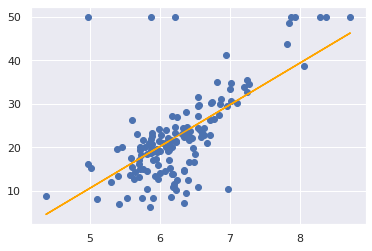

In [92]:
plt.scatter(df_feature_test, df_target_test)
plt.plot(df_feature_test, pred, color="orange")

**CS5.** *R2 Coefficient of Determination:* Write a function to calculate the coefficient of determination as given by the following equations.

$$r^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

where

$$SS_{res} = \Sigma_{i=1}^n (y_i - \hat{y}_i)^2$$ where $y_i$ is the actual target value and $\hat{y}_i$ is the predicted target value.

$$SS_{tot} = \Sigma_{i=1}^n (y_i - \overline{y})^2$$

where 
$$ \overline{y} = \frac{1}{n} \Sigma_{i=1}^n y_i$$
and $n$ is the number of target values.

You can use the following functions in your code:
- `np.mean(array)`: which is to get the mean of the array. You can also call it using `array.mean()`.
- `np.sum(array)`: which is to sum the array along a default axis. You can specify which axis to perform the summation.

In [93]:
def r2_score(y, ypred):
    #calulate ssres
    diff = y - ypred
    ssres = np.matmul(diff.T, diff)[0][0]
    print(ssres)
    #cal sstot
    ymean = np.mean(y)
    diff_mean= y - ymean
    sstot = np.matmul(diff_mean.T, diff_mean)[0] [0]
    
    #cal r2
    return 1 - (ssres / sstot)
    
target = prepare_target(df_target_test)
r2 = r2_score(target, pred)
print(r2)

8099.260692513175
0.45398075454064213


In [94]:
target = prepare_target(df_target_test)
r2 = r2_score(target, pred)
assert np.isclose(r2, 0.45398)

8099.260692513175


**CS6.** *Mean Squared Error:* Create a function to calculate the MSE as given below.

$$MSE = \frac{1}{n}\Sigma_{i=1}^n(y^i - \hat{y}^i)^2$$


In [95]:
# def mean_squared_error(target, pred):
#     m = target.shape[0]
#     error = target - pred
#     mse = (1/m) * np.matmul(error.T, error)
#     return mse[0][0]

def mean_squared_error(target, pred):
    ### BEGIN SOLUTION
    num_samples = target.shape[0]
    mse = 1/(num_samples) * np.sum((target-pred)**2)
    return mse
    ### END SOLUTION

# target = prepare_target(df)

In [96]:
mse = mean_squared_error(target, pred)
assert np.isclose(mse, 53.6375)

**CS8.** *Optional:* Redo the above tasks using Sci-kit learn libraries. You will need to use the following:
- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)
- [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [99]:
# # Read the CSV and extract the features
# df = None
# df_feature, df_target = None, None
# # normalize
# df_feature = None

### BEGIN SOLUTION
# our methods
df = pd.read_csv("housing_processed.csv")
df_feature, df_target = get_features_targets(df, ["RM"], ["MEDV"]) # extract the feat and target col
df_feature = normalize_z(df_feature) # normalise the feat 
### END SOLUTION


In [102]:
# # Split the data into training and test data set using scikit-learn function
# df_feature_train, df_feature_test, df_target_train, df_target_test = None, None, None, None

# # Instantiate LinearRegression() object
# model = None

# # Call the fit() method
# pass

# ###
# ### YOUR CODE HERE
# ###

# print(model.coef_, model.intercept_)
# assert np.isclose(model.coef_,[6.05090511])
# assert np.isclose(model.intercept_, 22.52999668)


# SKLearn methods
# Split the data into training and test data set using scikit-learn function
df_feature_train, df_feature_test, df_target_train, df_target_test = train_test_split(df_feature, df_target, random_state=100, test_size=0.3)

# Instantiate LinearRegression() object
model = LinearRegression()
model.fit(df_feature_train, df_target_train) # after calling fit (it will do closed form soln or grad desc to find the opt params), the model instance stores the opt params 

print(model.coef_, model.intercept_)
assert np.isclose(model.coef_,[6.05090511]) # beta_1
assert np.isclose(model.intercept_, 22.52999668) # beta_0

[[6.05090511]] [22.52999668]


In [107]:
# Call the predict() method
pred = model.predict(df_feature_test)


print(type(pred), pred.mean(), pred.std())
assert isinstance(pred, np.ndarray)
assert np.isclose(pred.mean(), 22.361699)
assert np.isclose(pred.std(), 5.7011267)

<class 'numpy.ndarray'> 22.361699489356496 5.7011267141173


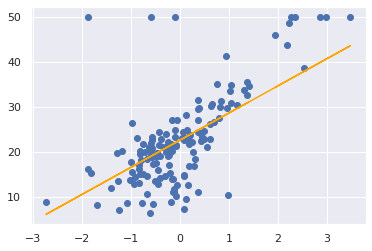

In [108]:
plt.scatter(df_feature_test, df_target_test)
plt.plot(df_feature_test, pred, color="orange")

In [105]:
r2 = r2_score(df_target_test, pred)
print(r2)
assert np.isclose(r2, 0.457647)

0.45764736329252076


In [106]:
mse = mean_squared_error(df_target_test, pred)
print(mse)
assert np.isclose(mse, 54.93216)

54.93216051758423
